# Delving deeper into distributions and hypothesis testing

Understanding the Student's t distribution inside and out, and how it can be used to test hypotheses, will pave a fantastic foundation for intuitively understanding other hypothesis tests, how confidence intervals are formulated, and uncertainty analyses. 

Here you will be introduced to some of the tools for working with the Student's t distribution and the normal distribution in Python. The tools you will use below are similar in how they are called and how they are used for tools for other distributions in Python.

Useful commands include:

-  `scipy.stats.ttest_ind`: Independent sample t-test (test null hypothesis that the difference between the means of two groups of independent samples is $E$)

-  `scipy.stats.ttest_1samp`: 1-sample t-test (test null hypothesis that mean of a group is no different from $E$)  

-  `scipy.stats.ttest_rel`: Matched-pairs t-test (test null hypothesis that mean difference between matched pairs of samples is $E$)

-  `scipy.stats.t.ppf`: Returns the t-value corresponding to a specified cumulative probability and degrees of freedom

-  `scipy.stats.t.cdf`: The inverse of the above. Returns the cumulative probability associated with a t statistic.

All of the `ttest` functions above have equal and unequal variance options. Remember to use the **`help()`** function to reference the syntax of the functions' arguments.

*Note: Once you import the stats library from scipy, you do not need to use `scipy` in calling these functions. (See examples below.)

In [64]:
# Import numerical tools
import numpy as np

# Import statistical tools
from scipy import stats
np.random.seed(12345678) #If you specify a random seed, it will initialize the random number
    #generator the same way each time, making your results reproducible each time you rerun
    #the code. Note that multiple draws of a random number within the same session will still 
    #return different values.

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

#Import pandas for reading in and managing data
import pandas as pd

#Import seaborn (useful for plotting - makes plots pretty)
import seaborn as sns

In [4]:
help(stats.t.ppf)


Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [5]:
stats.t.ppf(0.95,10)

1.8124611228107335

## An heuristic derivation of the student's t-distribution


Below we will randomly sample vectors of variables from a standard normal distribution, compute the t statistic, and see how that distribution of t-statistics compares to the Student's t distribution.

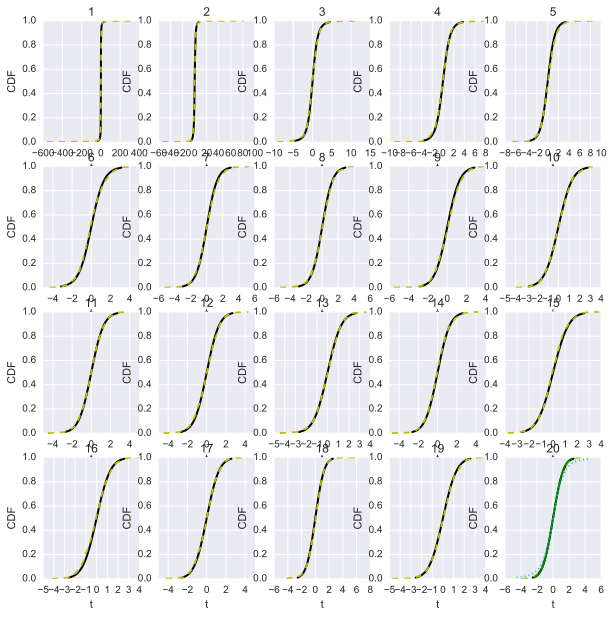

In [76]:
ntrials = 1000 # This is the number of times we will draw arrays of random numbers for each
# degree of freedom evaluated.
max_df = 20 # Maximum degrees of freedom tested.

pctiles = np.arange(0.01, 1.0, 0.01) #The array of cumulative probabilities for the student's t
# distribution that we would like to plot. 

fig = plt.figure(figsize=(10,10)) # This initializes a new figure window and calls it 'fig'. The
    # size given is in inches.

for df in range(1,max_df+1): # Loop over the degrees of freedom. Note how this for loop is called.
    # The colon is essential! The indent beneath specifies everything that is run as part of the
    # for loop. 
    # Comprehension check: What numbers does i include? How would you test this?
       
    X = np.random.normal(0,1,(df+1, ntrials)) #Generates a matrix of random numbers, representing
    # n trials of random draws, each with sample size df + 1. The 0 and 1 arguments represent 
    # the mean and standard deviation of the normal distribution from which the samples will be
    # drawn. 
    
    X_mean = np.mean(X, 0) #Finds the mean of the numbers drawn from the distribution down the rows
    # (i.e., axis 0)
    
    X_std_err = np.std(X,0)/np.sqrt(df+1) #Finds the standard error of the mean
    
    X_t = X_mean/X_std_err # The t-statistic for the mean. (In other words, how far the mean is 
        # from the expected value relative to the standard error, where here, the expected value
        # is zero)
    
    X_sort = np.sort(X_t) # Sorts X_mean from low to high
    
    cum_prob = np.arange(1,len(X_sort)+1)/len(X_sort) #The cumulative probability value (i.e., 
                # percentile) associated with each value in X_sort. 
    
    actual_t = stats.t.ppf(pctiles, df) # The actual cumulative probability of the t distribution
    # for each percentile defined above.
        
    ax = fig.add_subplot(4, 5, df) # Makes subplot number 'df' in a 4 x 5 array of subplots
    ax.plot(actual_t, pctiles, 'k-', linewidth=2)
    #print(X_t)
    #print(cum_prob)
    ax.plot(X_sort, cum_prob, 'y--')
    ax.set_xlabel('t') #In other words, deviation from expected value, which is 0 here
    ax.set_ylabel('CDF')
    ax.set_title(df)
    
actual_norm = stats.norm.ppf(pctiles) # The actual cumulative probability value of the 
    # normal distribution for each percentile defined above.
ax.plot(actual_norm, pctiles, 'g-')
actual_t = stats.t.ppf(pctiles, 3) # On this same plot, let's see how the t-distribution for 
    # 3 degrees of freedom looks.
ax.plot(actual_t, pctiles, 'c:')
plt.show() #This is outside the for loop, because it returns to the original indentation (or lack
    # thereof)

## Suggestions to increase your intuition for the t-distribution:

Here are some things you can play around with and think about (optional) to increase your familiarity with these distributions:

1. In words, what does the t-statistic represent?
2. What does the above analysis imply about assumptions we are making in using t-tests?
3. How sensitive are your experimental distributions to the number of trials you use? Try generating a plot that shows experimental distributions for numbers of trials that differ by orders of magnitude. 
4. How does the outcome change if we are working with an underlying distribution that is different from the standard normal? (In other words, a distribution that might have a different mean and standard deviation?) In order to achieve a match in your distributions, how would you need to adjust the way the t-statistic is computed in the code, if at all?

For your homework practice problem this week (distributed under separate cover) you will probe that underlying assumption you determined in #2!